In [1]:
from collections import Counter, defaultdict
import pickle
import math
import re

from matplotlib import pyplot as plt

# Hunt traditional chars

Download https://www.unicode.org/Public/UCD/latest/ucd/Unihan.zip from http://unicode.org/charts/unihan.html.

`cat Unihan_Variants.txt | grep kSimplifiedVariant | cut -f 1 > traditional_chars.txt`

(It's a bit more involved, but not worth the trouble, see https://unicode.org/reports/tr38/.)

Remove the 1st line. (`#`)

In [2]:
with open('traditional_chars.txt', 'r') as f:
    traditional_chars = set([
        chr(int(re.match(r'^U\+([0-9A-F]+)$', line).groups()[0], 16))
        for line in f.readlines()
    ])

In [3]:
''.join(traditional_chars)

'𨭎鰆軛𥢶𣯴𨆉鄒蘬臢紟鱻斷𦡶詭譓鰩羅釚𦔖𥼶實滿輈綸賒鵋𩑡鯧鍔𧃽𨟊𧾥濁\U0002d9d6殼𩟠萴閩鞸糞䝕鏗齽鱧囕課愷檥鬜䳮蝦黨釔𣴇偩決澫級𢅡賤膒餚鮐𫃞櫢懼\U00030d0f確㵑𡃈埰𨈌銦䀍櫓𢳚諱薊譟𦇛隨鯥歍紿縞齼㿗䭞𥀲簣澱蟎𨽏闤龕𩔳䁪蓀鑲淥齒縐鮨檾樢卻檣鈃𫄇戩譀諉誗縳閒壞𧩧惀𪉱䔇搵輙銣櫟罏驞蠙𦎹蛵諆覽偉頦甖鱺羈㩇癪鯻𩝧盡纘蹡駁噠覦𩍜㯤鶻蠒鯕鑯礙穌𧏻殫葷紬豄鍘䮽釥軹䞶𪙤慯禬鴘薌瘓㻽輓騲壣麴𦣎𤣤膾䋦鱌鑔𣯶鱅恥糧𨶯㗼謭擄𩔑轀襌鋂釨𬍁𩛲㦖氂錢矊贉膃璼䙡歿訰㲲嬻縸輐誹睪䚕廗瀘𪉣針覭豅鱚諩牽䴸緶騞鹹覡緆𢳂講㶕𧠈躧𠠫鏾漍䮠篵鎷𨶲𨨛鸛𢸴䤻嚀蔱𧹈賃鯔餶撟䡶謂訒凜𠼤繿贈譨𢲐䐢鸕鴜繚瀾糾𡓗蕘鑈㙔𨶻𨭚𣼊𧨝滌𦄧樻𩚚員傯憲朧儖隉轤𢸸鬡銗䛄𩦺蹌澾鯷嚦聲征歗䋐諕㮓箋鮏𠼮餒鮇繓蟂鋝飷瘲磵龲𨇤璸臉絪钀駑騌銠鄧輄諓輸骯鮓騴縍𩸬蝁𢿓𠟪颷𧳟餟鯒璾鉒𠐊鴮鶬瀏鋤搎悏𢴩貗鮛霧凱顁種壏鬢鴩𧶲䞋鍈溰辭潣㬣𨵬痮遠鍮𩉍堯廩𤺉𢐗臠攎鰂䰾駧質𩤵𥜰梟齙島𩡺鑡躕皟讆𧵊攧鈪飉鱝𩺝𥌃鶴闖鍨嬐鏽㹓現灧籔慮鰉蕧軫隲𣈶䑼躍𨧀鮮瓅減𪝵黸䬧贔綵艭䗿纓𪄠爧頷𩿊儹誨賈謋檰麩壇紞轅𩢲敵瀂𨷈諷鮒𨯵䛳龍鯤𨭥薩懶鈔鈾臗銊詍舊鯽韻顆幓謁贐澀𣀷轟籛䵐𥺼鍚髒𩴵椏鬥𩒲鐉壛䕳頠㜥璡𨬟嶴余釟較驋繶與嫈僗闃顥鬺鈲埉襴頃頕𩜦嬡濟瀵謱鑘讞褺獨謏𬄝𩋰顮絑訴\U000310e2蕪欑詿𩶀錍𪗝䶦渦贛鉍鴒蹣䔈𩘝聞棶𡅘餉訂駔\U00030ede䤩\U00030ac6磒𤛮㔋雛葦𧬪𩯳慺覴輴驤潚埬䛿鮋闡饅濃鸁𨼳鉨緪禓餷鵯絃鋶嬌鉛㼻銫詉飄鍡滷𨮰併嬤攋鶔齮淶𥻤憦習闆萵鯨𦣇曬鏍鈮𪄆𩞬鷢轊𪃿䰽緟蕭綏櫳毀鳽𡮉致慱旟錜饒㩷懙椲蒭邁䡁縶懣燖螴𤒦𡤫這鴟誼餑芻錤灍離脈齖燜𤎤䨴\U0002d5e1鑱嚩盜鵳餹僕𣫒崙𥕥鯼蛺蠑㒣繈鬠複縖𨍹顠櫫磾櫯鈋錁鷰㜄個別澦捨撫朥譩麲𪍤𫒷顉譇錦㔃韆𤒻儐㘙撏錆轈冪獹彠輁䲼綢適縕囒罷濧齵鏒誑鵼綻塊鶼䶧贆東鈤軗蝟𧩪䠟藥進鐧熉戶躚輢𠐮鬧䲁塵詗魾綺鈸憤雞𡢃䬟𪀗颯橅賨㰍覿動憸瞜𠩘職躪𨭛𫋧蓮懲豬㜐屨鶩𤸫𧬇灤熓龯䱴𠑲注𧔥𧦧𨣧韙𦢈籠𠬙異𫾡蒳閬鸒鏸鰬誂𤥭篔錳䙔鈥𬙔鰜緢羂餔頗䚳惱搶𩅦𢛔鎌闞𩢰夾儈綀𨳌囀宮鍂禮謞締專鮆𧛸螮嘪姦綅閣𡷨饜粯𦌾鷷檻騾𪗋輑𣔿紙養𩚩於𢣐櫬檢𨎌幩韣縴韗撾廚統妝饎錪詒鴳魟緯䬹𬵮薉瀇𩯁詳錧驅䱜鞼鶅䜉㠏釷垷趫淪驂懕㵗𪁈詡織藣綪鶂腖𪌬閞籙巒揚選閧駹䴇鵶魻䋆鬚膢闋鵝𨑊韛讓賜蕡徿騱鏝𦁧壠曮蔣儅紩𡄤𩤸窱鬖絀詃傭蟡㯆鰒嫻\U000307eb綡瞱𨯟𢲾㿹𫪛鸀鵻䉶腸蠅爛岡騧豈魬飵塒鍧鈦𣶯勻𡂡𩹝鱨𫒡餡䮞軜鵎婁

In [4]:
len(traditional_chars)

6247

# Process wikipedia dump

In [8]:

def process_line(line, char_counter, couple_counter):
    only_zh = [
        char if 0x4e00 <= ord(char) <= 0x9fff else '🚧'
        for char in line
    ]
    
    only_zh_str = ''.join(only_zh)
    
    zh_groups = [
        zh_group
        for zh_group in only_zh_str.split('🚧')
        if len(zh_group) >= 2
    ]
    
    for zh_group in zh_groups:
        if set(zh_group) & traditional_chars:
            continue
    
        previous_char = None
        for char in zh_group:
            char_counter[char] += 1
            if previous_char:
                couple_counter[(previous_char, char)] += 1
            previous_char = char


In [9]:
char_counter = Counter()
couple_counter = Counter()

In [10]:
with open('zhwiki-latest-pages-articles.xml', 'r') as file:
    for i, line in enumerate(file):
        process_line(line, char_counter, couple_counter)

        if i % 1000000 == 0:
            print('{} / 177292781'.format(i))

0 / 177292781
1000000 / 177292781
2000000 / 177292781
3000000 / 177292781
4000000 / 177292781
5000000 / 177292781
6000000 / 177292781
7000000 / 177292781
8000000 / 177292781
9000000 / 177292781
10000000 / 177292781
11000000 / 177292781
12000000 / 177292781
13000000 / 177292781
14000000 / 177292781
15000000 / 177292781
16000000 / 177292781
17000000 / 177292781
18000000 / 177292781
19000000 / 177292781
20000000 / 177292781
21000000 / 177292781
22000000 / 177292781
23000000 / 177292781
24000000 / 177292781
25000000 / 177292781
26000000 / 177292781
27000000 / 177292781
28000000 / 177292781
29000000 / 177292781
30000000 / 177292781
31000000 / 177292781
32000000 / 177292781
33000000 / 177292781
34000000 / 177292781
35000000 / 177292781
36000000 / 177292781
37000000 / 177292781
38000000 / 177292781
39000000 / 177292781
40000000 / 177292781
41000000 / 177292781
42000000 / 177292781
43000000 / 177292781
44000000 / 177292781
45000000 / 177292781
46000000 / 177292781
47000000 / 177292781
48000000

In [12]:
#with open('char_counter.pickle', 'wb') as f:
#    pickle.dump(char_counter, f)
#with open('couple_counter.pickle', 'wb') as f:
#    pickle.dump(couple_counter, f)


In [ ]:
with open('char_counter.pickle', 'rb') as f:
    char_counter = pickle.load(f)
with open('couple_counter.pickle', 'rb') as f:
    couple_counter = pickle.dump(f)


# Basic stats

In [13]:
nb_unique_char = len(char_counter)
nb_unique_couple = len(couple_counter)

print('{} unique chars'.format(nb_unique_char))
print('{} unique couples'.format(nb_unique_couple))
print('Matrix is {} full'.format(nb_unique_couple/(nb_unique_char**2)))


14153 unique chars
3700709 unique couples
Matrix is 0.01847514786634777 full


In [14]:
char_occ_list = [occ for c, occ in char_counter.items()]
couple_occ_list = [occ for c, occ in couple_counter.items()]

nb_char = sum(char_occ_list)
nb_couple = sum(couple_occ_list)

print('{} chars vs {} couples ({})'.format(nb_char, nb_couple, nb_couple/nb_char))

446317674 chars vs 347268630 couples (0.7780750130007175)


# Normalize

In [15]:
char_proba_sorted = {
    char: occ/nb_char
    for char, occ in sorted(char_counter.items(), key=lambda item: -item[1])
}

couple_proba_sorted = {
    couple: occ/nb_couple
    for couple, occ in sorted(couple_counter.items(), key=lambda item: -item[1])
}

In [16]:
char_proba_sorted

{'的': 0.016937193932409677,
 '国': 0.010224320625940527,
 '中': 0.00966608147361872,
 '人': 0.008657741391616949,
 '年': 0.007547637470435464,
 '大': 0.006814000827580939,
 '一': 0.006802910072523814,
 '斯': 0.0056701586054600205,
 '为': 0.005198738779948024,
 '行': 0.005168379238327004,
 '在': 0.005048471371985148,
 '学': 0.00481395231504993,
 '小': 0.0044862709156348575,
 '公': 0.004465839280207398,
 '是': 0.004357770514819451,
 '尔': 0.004294308990326921,
 '市': 0.004294259698082223,
 '文': 0.004282756680614893,
 '区': 0.004281692416240724,
 '地': 0.004259190506535934,
 '日': 0.004065456300975435,
 '西': 0.004018767583019802,
 '和': 0.003965812028317749,
 '名': 0.003889487468515531,
 '有': 0.0038670124454896673,
 '个': 0.003754527543088065,
 '村': 0.003745374869470215,
 '部': 0.00369125422534802,
 '特': 0.0035334249389371033,
 '里': 0.003399061001559172,
 '会': 0.0033260300599254333,
 '德': 0.003294375476602793,
 '南': 0.0032680489368207273,
 '政': 0.0032219808530369785,
 '星': 0.0032078944738361402,
 '克': 0.0031901

In [17]:
couple_proba_sorted

{('中', '国'): 0.0037476491901960738,
 ('行', '星'): 0.0025526233106629875,
 ('小', '行'): 0.0025148715563510587,
 ('来', '源'): 0.0018930273085708894,
 ('参', '考'): 0.0017176184327389434,
 ('人', '民'): 0.0016839442134465184,
 ('个', '来'): 0.0016364766376968747,
 ('留', '言'): 0.0015399202628812168,
 ('人', '口'): 0.0015183433067363441,
 ('一', '个'): 0.0014183169956929309,
 ('大', '学'): 0.001386724738137159,
 ('行', '政'): 0.0013673737244852783,
 ('美', '国'): 0.0013012404834839243,
 ('研', '究'): 0.0012902144371635296,
 ('日', '本'): 0.0012486759889599013,
 ('使', '用'): 0.001226261064813139,
 ('公', '里'): 0.0011785199256264523,
 ('公', '司'): 0.0011678019981246218,
 ('的', '一'): 0.0011580832970717798,
 ('政', '区'): 0.0010589611851781718,
 ('香', '港'): 0.0010584572525309873,
 ('国', '家'): 0.001057803579897211,
 ('条', '目'): 0.0010090142608043808,
 ('足', '球'): 0.0009591969191112943,
 ('共', '和'): 0.0009582984791917427,
 ('北', '京'): 0.0009574806684957406,
 ('建', '立'): 0.0009500973353107075,
 ('委', '员'): 0.0009479318647353

In [18]:
char_proba_list_sorted = [occ for c, occ in char_proba_sorted.items()]
couple_proba_list_sorted = [occ for c, occ in couple_proba_sorted.items()]


In [19]:
char_log10proba_list_sorted = [math.log10(p) for p in char_proba_list_sorted]
couple_log10proba_list_sorted = [math.log10(p) for p in couple_proba_list_sorted]


# Occurrence graphs

In [20]:
plt.rcParams['figure.figsize'] = [12, 8]

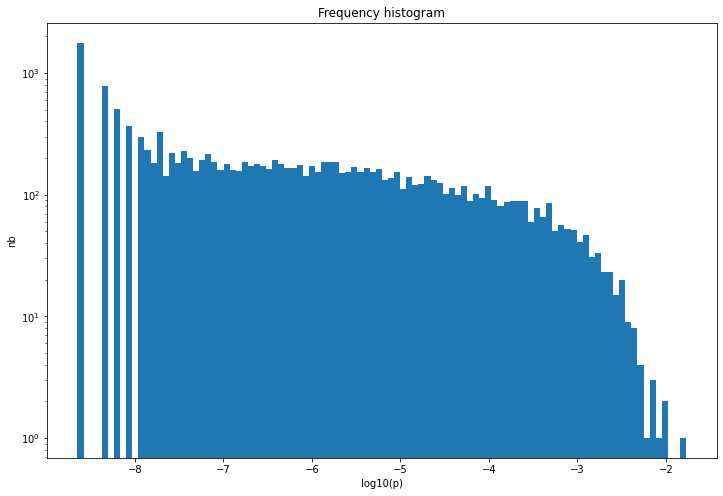

In [21]:
plt.title('Frequency histogram')
plt.xlabel('log10(p)')
plt.ylabel('nb')
_ = plt.hist(char_log10proba_list_sorted, log=True, bins=100)


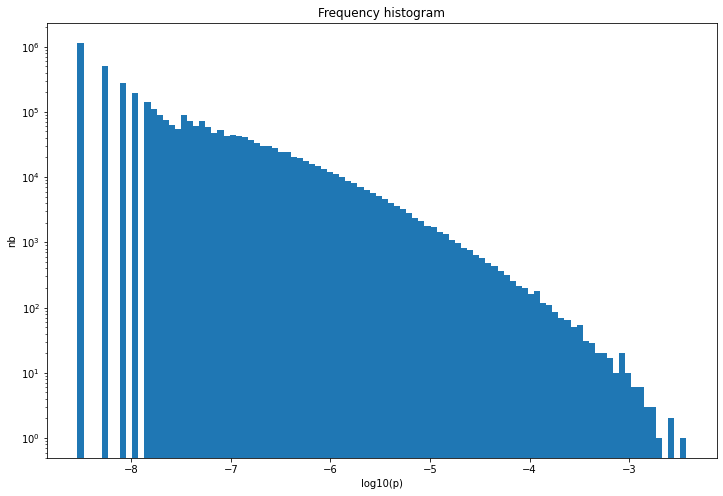

In [22]:
plt.title('Frequency histogram')
plt.xlabel('log10(p)')
plt.ylabel('nb')
_ = plt.hist(couple_log10proba_list_sorted, log=True, bins=100)


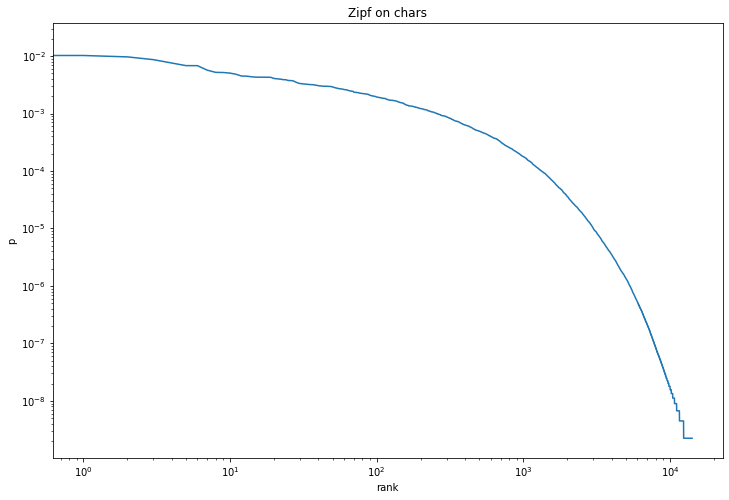

In [23]:
plt.title('Zipf on chars')
plt.xlabel('rank')
plt.ylabel('p')
_ = plt.loglog(char_proba_list_sorted)


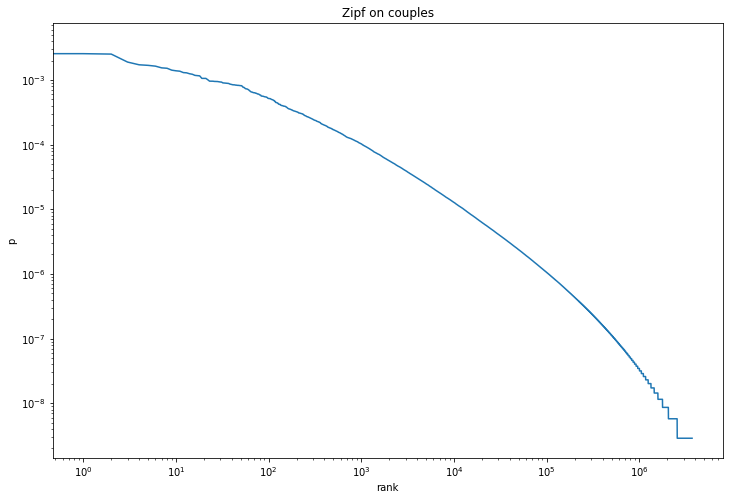

In [24]:
plt.title('Zipf on couples')
plt.xlabel('rank')
plt.ylabel('p')
_ = plt.loglog(couple_proba_list_sorted)


# Deviation from independance

In [25]:
dependance_dict = {
    couple: p_couple / (char_proba_sorted[couple[0]] * char_proba_sorted[couple[1]])
    for couple, p_couple in couple_proba_sorted.items()
}

In [26]:
dependance = [
    p_couple / (char_proba_sorted[couple[0]] * char_proba_sorted[couple[1]])
    for couple, p_couple in couple_proba_sorted.items()
]

In [27]:
dependance_log10 = [math.log10(dep) for dep in dependance]

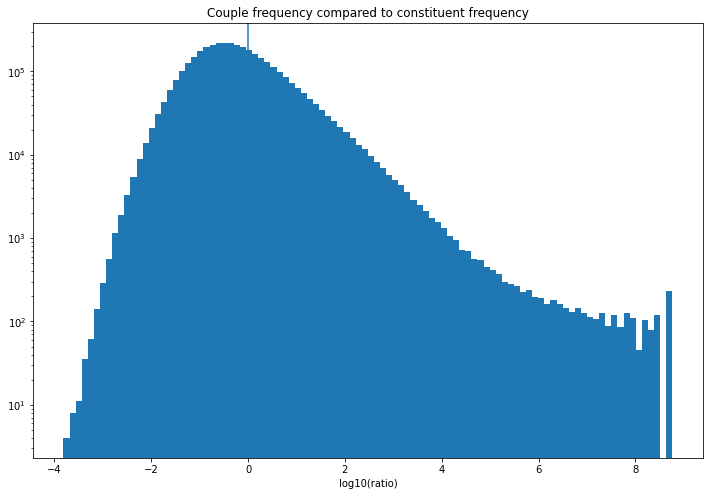

In [28]:
plt.title('Couple frequency compared to constituent frequency')
plt.xlabel('log10(ratio)')
_ = plt.hist(dependance_log10, log=True, bins=100)
_ = plt.axvline(x=0.0)

# Detect 2-char words

In [29]:
word_couple_set = defaultdict(set)

for couple, couple_proba in couple_proba_sorted.items():
    char1, char2 = couple
    word_couple_set[char1].add(couple)
    word_couple_set[char2].add(couple)


In [30]:
use_fraction = {
    couple: (couple_counter[couple]/char_counter[couple[0]], couple_counter[couple]/char_counter[couple[1]])
    for couple in couple_proba_sorted.keys()
}

In [31]:
use_fraction[('屳', '定')]

(0.5, 3.4429511600163195e-06)

In [32]:
use_fraction[('决', '定')]

(0.2727987243570895, 0.08305258935749367)

In [33]:
min_use_fraction = [
    min(pair)
    for pair in use_fraction.values()
]


In [34]:
min_use_fraction_log10 = [
    math.log10(fraction)
    for fraction in min_use_fraction
]


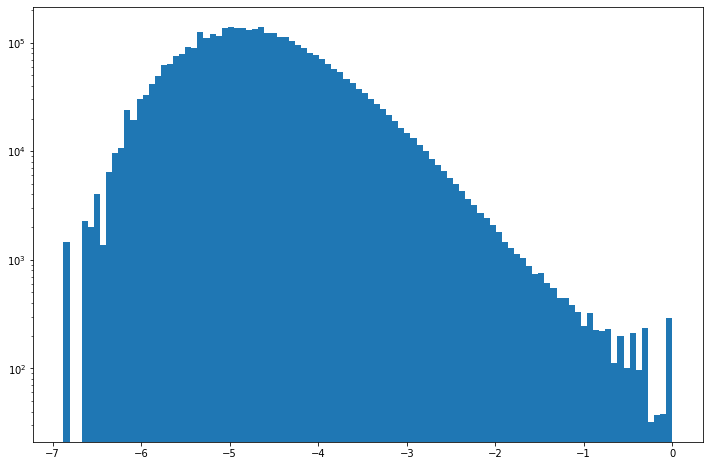

In [35]:
_ = plt.hist(min_use_fraction_log10, bins=100, log=True)

In [36]:
words = [
    couple
    for couple in couple_proba_sorted.keys()
    if (
        min(use_fraction[couple]) >= 0.01 and 
        dependance_dict[couple] >= 5 and
        couple_proba_sorted[couple] >= 0.000001
    )
]
len(words), len(couple_proba_sorted)

(8807, 3700709)

In [37]:
word_set = set(words)
word_ranks = {
    word: rank
    for rank, word in enumerate(words)
}

In [38]:
with open('words.txt', 'w') as f:
    f.write('word\tlog10(p)\trank\n')
    for rank, word in enumerate(words):
        f.write('{}\t{:10.4f}\t{}\n'.format(
            ''.join(word),
            math.log10(couple_proba_sorted[word]),
            word_ranks[word]
        ))

# Generate vocabulary list by char

In [156]:
def study_char(char):
    given_char_couples = sorted(word_couple_set[char], key=lambda couple: -couple_proba_sorted[couple])
    given_char_dependance = [
        dependance_dict[couple]
        for couple in given_char_couples
    ]
    given_char_couple_proba = [
        couple_proba_sorted[couple]
        for couple in given_char_couples
    ]
    given_char_fraction = [
        couple_counter[couple] / char_counter[char]
        for couple in given_char_couples
    ]
    return sorted(
        zip(given_char_couples, given_char_dependance, given_char_couple_proba, given_char_fraction),
        key=lambda item: -item[1],
    )

定_zip = study_char('定')
定_zip

定_dependance = list(zip(*定_zip))[1]
_ = plt.hist([math.log10(ratio) for ratio in 定_dependance], bins=100)

定_fraction = list(zip(*定_zip))[3]
_ = plt.hist([math.log10(fraction) for fraction in 定_fraction], bins=100, log=True)

In [39]:
interesting_chars = sorted(
    set([
        char
        for char, p in char_proba_sorted.items()
        if p >= 0.000001
    ] + [
        char
        for word in words
        for char in word
    ]),
    key = lambda char: -char_proba_sorted[char],
)

In [40]:
len(interesting_chars)

5334

In [41]:
with open('words_by_char.txt', 'w') as f:
    for char in interesting_chars:
        f.write('word\tlog10(p)\trank\tdependance\tuse fraction\tother use fraction\n')
        f.write('{}\t{:10.4f}\n'.format(
            char,
            math.log10(char_proba_sorted[char]),
        ))

        given_char_couples = sorted(
            word_couple_set[char],
            key=lambda couple: -couple_proba_sorted[couple],
        )

        for couple in given_char_couples:
            given_couple_proba = couple_proba_sorted[couple]
            given_couple_dependance = dependance_dict[couple]
            given_couple_use_fraction = use_fraction[couple]
            given_couple_char_use_fraction = couple_counter[couple]/char_counter[char]
            other_chars = set(couple) - set([char])
            other_char = list(other_chars)[0] if other_chars else char
            given_couple_other_char_use_fraction = couple_counter[couple]/char_counter[other_char]

            if couple in word_set:
                f.write('{}\t{:10.4f}\t{}\t{:10.4f}\t{:10.4f}\t{:10.4f}\n'.format(
                    ''.join(couple),
                    math.log10(couple_proba_sorted[couple]),
                    word_ranks[couple],
                    given_couple_dependance,
                    given_couple_char_use_fraction,
                    given_couple_other_char_use_fraction,
                ))

        f.write('\n')